<a href="https://colab.research.google.com/github/3lson/QuantumCoinFlipandTeleportation/blob/main/QuantumCoinFlipping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Coin Flipping and Teleporation Experimental Projects

## Quantum Coin Flipping

## 1. Install the dependencies

In [ ]:
!pip uninstall qiskit -y

Found existing installation: qiskit 1.2.4
Uninstalling qiskit-1.2.4:
  Successfully uninstalled qiskit-1.2.4


In [ ]:
!pip install qiskit[visualization]==0.43.1


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.1/164.1 kB 11.3 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for qiskit: filename=qiskit-0.43.1-py3-none-any.whl size=8023 sha256=3be0218298bfece03883660656b79eb52b29315d73faf864e3d6aeec16480d2b
  Stored in directory: /root/.cache/pip/w

In [ ]:
import qiskit
print(qiskit.__version__)


0.24.1


Results: {'0': 502, '1': 498}


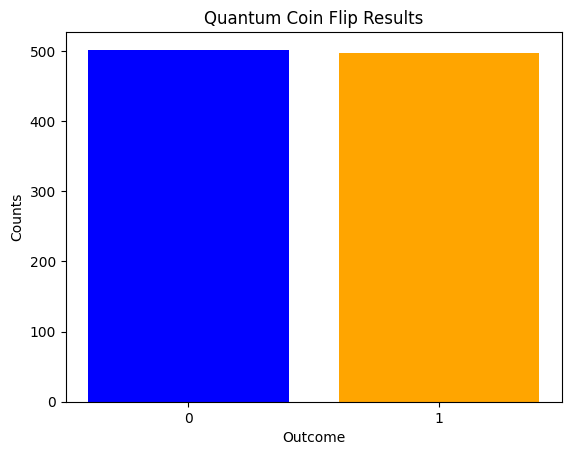

In [ ]:
# Step 5: Import libraries
from qiskit import QuantumCircuit, Aer, execute
import matplotlib.pyplot as plt

# Define the quantum coin flip function
def quantum_coin_flip(num_flips=1000):
    # Create a quantum circuit with 1 qubit
    qc = QuantumCircuit(1, 1)

    # Apply Hadamard gate to create superposition
    qc.h(0)

    # Measure the qubit
    qc.measure(0, 0)

    # Use Aer's qasm_simulator
    simulator = Aer.get_backend('qasm_simulator')

    # Execute the circuit on the qasm simulator
    job = execute(qc, backend=simulator, shots=num_flips)
    result = job.result()

    # Get the results
    counts = result.get_counts(qc)

    return counts

def plot_results(counts):
    # Plot the results
    labels = list(counts.keys())
    values = list(counts.values())

    plt.bar(labels, values, color=['blue', 'orange'])
    plt.xlabel('Outcome')
    plt.ylabel('Counts')
    plt.title('Quantum Coin Flip Results')
    plt.show()

# Run the quantum coin flip
counts = quantum_coin_flip()
print("Results:", counts)

# Plot the results
plot_results(counts)

In the quantum coin flipping experiment, the qubit is initialized in the state |0⟩ and a Hadamard gate is applied, placing the qubit in a superposition of states |0⟩ and |1⟩. This superposition mimics the randomness of flipping a classical coin. When we measure the qubit, it collapses to either |0⟩ or |1⟩ with equal probability.

Results: You should see a bar chart with roughly equal counts of 0 and 1. This demonstrates the quantum principle of superposition, where a qubit can exist in multiple states simultaneously until measured, at which point it collapses to one of its possible states.



## Quantum Teleportation

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def quantum_teleportation():
    # Create a Quantum Circuit with 3 qubits and 2 classical bits
    qc = QuantumCircuit(3, 2)

    # Step 1: Create an entangled pair (Bell state)
    qc.h(1)  # Apply Hadamard to the second qubit
    qc.cx(1, 2)  # CNOT with qubit 1 as control and qubit 2 as target

    # Step 2: Prepare the qubit to be teleported (let's teleport the state |ψ⟩ = |0⟩)
    # In a real scenario, this could be any arbitrary state. Here, we assume |0⟩ for simplicity.
    # Apply a state (|ψ⟩) on the first qubit
    # To demonstrate, you can change this to other states (|0⟩, |1⟩, |+⟩, |−⟩)
    # Uncomment to teleport |1⟩ state
    # qc.x(0)

    # Step 3: Bell measurement
    qc.cx(0, 1)  # CNOT gate
    qc.h(0)  # Hadamard gate
    qc.measure(0, 0)  # Measure qubit 0
    qc.measure(1, 1)  # Measure qubit 1

    # Step 4: Apply corrective operations based on measurement
    # The measurement results are stored in the classical bits
    qc.x(2).c_if(1, 1)  # If the second measurement is 1, apply X gate to qubit 2
    qc.z(2).c_if(0, 1)  # If the first measurement is 1, apply Z gate to qubit 2

    # Simulate the circuit
    simulator = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend=simulator, shots=1024)
    result = job.result()

    # Get the results
    counts = result.get_counts(qc)

    return counts, qc


Results: {'11': 238, '01': 263, '00': 237, '10': 286}


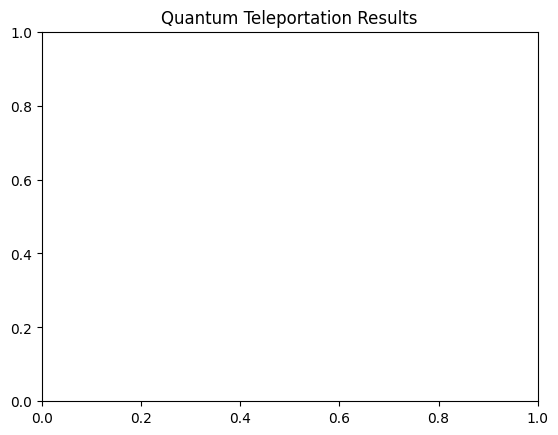

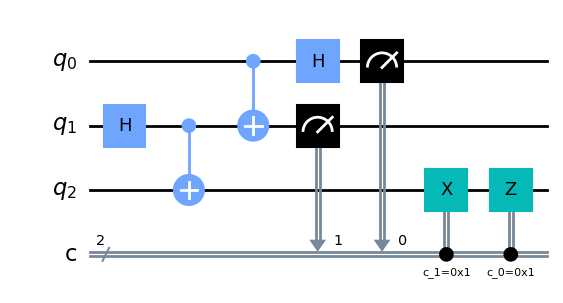

In [ ]:
# Run the teleportation protocol
counts, qc = quantum_teleportation()

# Print the counts
print("Results:", counts)

# Plot the results
plot_histogram(counts)
plt.title('Quantum Teleportation Results')
plt.show()

# Visualize the circuit
qc.draw('mpl')


Quantum teleportation involves transferring the state of one qubit to another distant qubit using an entangled pair and classical communication. In this experiment, you create entanglement between two qubits and then perform a series of operations and measurements to "teleport" the state of one qubit to the other.

Results: You'll see that the state of the target qubit matches the original qubit, proving that quantum information has been successfully transmitted without physically moving the qubit. This showcases the power of entanglement and quantum communication principles.